# 1. Data Understanding

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

In [61]:
# Import the dataset
df = pd.read_csv('/users/crazyworld/desktop/MLpython/lab5/Churn_Modelling.csv')
# The dataset has 2000 instances and 21 features
display(df.shape)

(10000, 14)

In [62]:
# Check the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
# describe the data summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Integer','Object','Integer','Object','Object','Integer','Integer','Float','Integer','Integer','Integer','Float',
                            'Integer']
df_describe['Description'] = [' Row numbers from 1 to 10000', 'Unique Ids for bank customer identification', 'Customers last name',
                             'Credit score of the customer', 'The country from which the customer belongs', 'Male or Female', 'Age of the customer','Number of years for which the customer has been with the bank',
                              'Bank balance of the customer','Number of bank products the customer is utilising','Binary Flag for whether the customer holds a credit card with the bank or not','Binary Flag for whether the customer is an active member with the bank or not','Estimated salary of the customer in Dollars', 'Binary flag 1 if the customer closed account with bank and 0 if the customer is retained']
df_describe

,Features,Data_Type,Description
0,RowNumber,Integer,Row numbers from 1 to 10000
1,CustomerId,Integer,Unique Ids for bank customer identification
2,Surname,Object,Customers last name
3,CreditScore,Integer,Credit score of the customer
4,Geography,Object,The country from which the customer belongs
5,Gender,Object,Male or Female
6,Age,Integer,Age of the customer
7,Tenure,Integer,Number of years for which the customer has been with the bank
8,Balance,Float,Bank balance of the customer
9,NumOfProducts,Integer,Number of bank products the customer is utilising


In [66]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 0


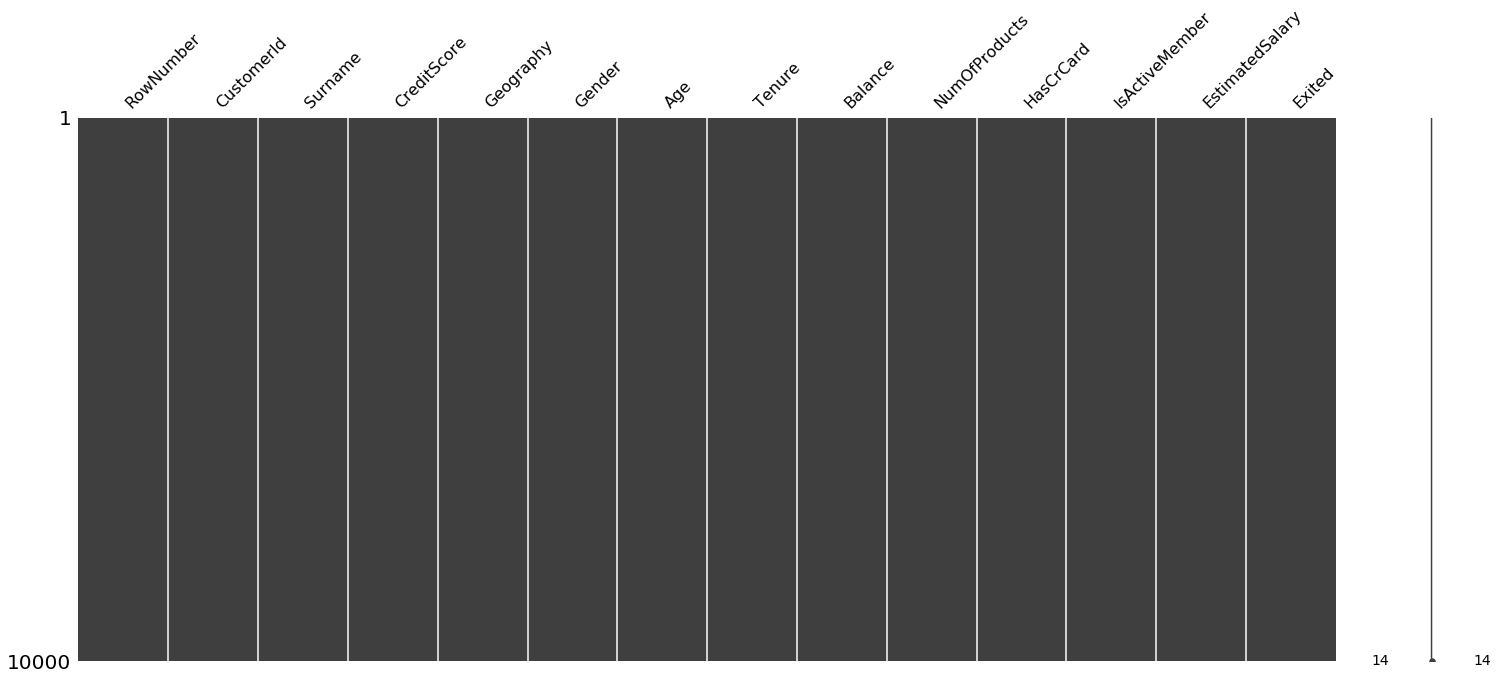

In [67]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 10000 instance and 14 features (10000 x 14).

[7963 2037]


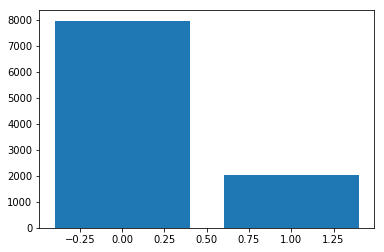

In [68]:
# Set our target as the 'Exited'
target = df['Exited']
target_names='Exited'
y = target
vals = np.bincount(y)
print(vals)
plt.bar(range(len(vals)),vals)
plt.show()
# Delete the column of target from our table
df = df.drop("Exited",axis=1)
# Delete 'RowNumber', 'CustomerId', and 'Surname' from our table, since they are not useful for our model.
df = df.drop("RowNumber",axis=1)
df = df.drop("CustomerId",axis=1)
df = df.drop("Surname",axis=1)

There are 7963 instances for not leaving, and 2037 instances for leaving the bank.

In [69]:
# One hot encoding some categorical features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
# One hot encoding 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# One hot encoding 'Geography'
df['Geography'] = label_encoder.fit_transform(df['Geography'])
# define different catagories according to age range
df['Age'] = pd.cut(df.Age, [0,20,30,50,1e6], labels=['0','1','2','3'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,2,2,0.00,1,1,1,101348.88
1,608,2,0,2,1,83807.86,1,0,1,112542.58
2,502,0,0,2,8,159660.80,3,1,0,113931.57
3,699,0,0,2,1,0.00,2,0,0,93826.63
4,850,2,0,2,2,125510.82,1,1,1,79084.10


In [70]:
X = df.values
# Since each feature's data has different unit, we need to standarize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# 2. Identify groups of features in your data that should be combined into cross-product features.

1. {Geography,NumOfProducts}: We think that 'Geography' and 'NumberOfProducts' should be crossed. For a specific area or country, the number of products of customers in a bank is related to the economic in that country. For instance, if a country's economic develops very well, the average fortune for the citizens is likely to be high. So, they may have extra money for various products in the bank other than the basic needs for daily life. The bank will also try to introduce more products for them. If a country is suffering from poor economic, and people are losing their jobs. It is very unlikely that they will have energy or money to buy many products in the bank. 

2. {Gender,NumberOfProducts}: Actually, this is a interesting cross-product feature. From our usual point of view, we think that men are more likely interested in the products of the bank. Women have less interest for the products, and they may be harder to persuaded than men. Many believe that financial products are “gender-neutral” since they are open to both men and women. What financial institutions often don’t realize is that “neutral” products were often designed with men’s needs in mind — and unintentionally put women off. The reverse is not true, however: when products are created with women’s specific needs in mind, the data proves that men are just as or even more interested.

3. {Age,NumberOfProducts}:

<img src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" width="500"> 

From the above plot, we see that younger consumers primarily concerned with saving. But even among 18 to 35 year olds, behaviors are already changing. Older people from 18 to 35 year old show less concern with saving. By age 30, many people are on an established career path and their financial concerns are already beginning to shift. From 35 on up, you see people showing increased concern with protecting their assets. So, it is most likely that the number of products for customers in a bank will be affected by their age.

4. {HasCrCard,IsActiveMember}: We think that thses two features shoule be crossed. Since credit card is widely used in our daily life, many of the services and products from the bank are related with the credit card. If a customer has a credit card, he/she is most likely to use it. Then many customers would pay off the credit card bill monthly. Otherwise, if a customer does not have a credit card, he/she most likely does not go to the bank or use the bank's services regularly.

5. {HasCrCard,IsActiveMember,NumberOfProducts}: Like we discussed in 4, many products and services of the bank are related with the credit card. So, the NumberOfProducts should be crossed with the other two features.

# 3. Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. 

For this lab, we will use recall score to evaluate our model. As you can see from the distribution of the target feature 'Exited', the number of instances for leaving and not leaving are not even, which indicate that accuracy score would perform bad on our model. In this model, we are predicting a customer is whether leaving or not for a bank, the bank will take some action,such as new services, especially against those who are leaving according to our prediction to retain them. If our model predicts lots of people who are actually leaving into not leaving, then the bank will not take actions against them according to our prediction, which will most likely lose all of them. This is a great loss and the bank want the right prediction from us, they want to retain as much people as possible. So, we need to make sure the recall score of this model to be relatively high. On the hand, if we predict lots of people who are actually not leaving into leaving, which means the precision score is low. The bank will take actions against them, which most likely make them happier and stay at the bank longer. There is hardly negative effect for the bank by doing that. So, we do not care much about the precision score, and we use the recall score to evaluate our model to get a good model for the bank.